In [13]:
import os
import wave
import librosa
import numpy as np
import asv
import pandas as pd

# Load the audio data and transcriptions
audio_data = []
transcriptions = []
for directory in os.listdir('kaggle/input/vidtimit-audiovideo-dataset'):
    if os.path.isdir(f'kaggle/input/vidtimit-audiovideo-dataset/{directory}'):
        for speaker in os.listdir(f'kaggle/input/vidtimit-audiovideo-dataset/{directory}'):
            if os.path.isdir(f'kaggle/input/vidtimit-audiovideo-dataset/{directory}/{speaker}'):
                for audio_file in os.listdir(f'kaggle/input/vidtimit-audiovideo-dataset/{directory}/{speaker}/audio'):
                    audio_path = f'kaggle/input/vidtimit-audiovideo-dataset/{directory}/{speaker}/audio/{audio_file}'
                    with wave.open(audio_path, 'rb') as f:
                        audio = f.readframes(f.getnframes())
                        audio_data.append(np.frombuffer(audio, dtype=np.float32))
                        transcriptions.append(audio_file.split('.')[0])
                        f.close()

# Preprocess the audio data
audio_data = [np.nan_to_num(audio) for audio in audio_data]
audio_data = [librosa.resample(y=audio, orig_sr=16000, target_sr=16000) for audio in audio_data]
audio_data = [librosa.util.normalize(np.asarray(audio, dtype=float)) for audio in audio_data]
audio_data = [librosa.feature.mfcc(audio, 16000, n_mfcc=40, n_fft=320, hop_length=160) for audio in audio_data]
audio_data = [audio[:, :audio.shape[1] // 8 * 8] for audio in audio_data]
audio_data = [audio.ravel() for audio in audio_data if audio is not None]




# Create the labels list
labels = [0 if transcription == "sa1" else 1 for transcription in transcriptions]
labels= np.array(labels) 


In [14]:
audio_data_list = []
for array in audio_data:
    audio_data_list.append(array.tolist())
audio_data_list = np.array(audio_data_list)

In [1]:
from keras.layers import GRU, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum length of the sequences
max_length = 20000

# Pad the sequences with zeros to the maximum length
audio_data_list = pad_sequences(audio_data_list, maxlen=max_length, padding='post', dtype='float32')
# Define the model
model = Sequential()
model.add(GRU(32, input_shape=(20000, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the data
audio_data = audio_data_list.reshape((40, 20000, 1))

# Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(audio_data, labels, batch_size=32, epochs=20, validation_split=0.2)

# Plot the accuracy curve for the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 3000 files belonging to 3 classes.
Epoch 1/20
77/77 [==============================] - 20s 246ms/step - loss: 0.9501 - accuracy: 0.5451 - val_loss: 0.7175 - val_accuracy: 0.6500
Epoch 2/20
77/77 [==============================] - 18s 228ms/step - loss: 0.6352 - accuracy: 0.6980 - val_loss: 0.7135 - val_accuracy: 0.6370
Epoch 3/20
77/77 [==============================] - 17s 223ms/step - loss: 0.5581 - accuracy: 0.7398 - val_loss: 0.5902 - val_accuracy: 0.7389
Epoch 4/20
77/77 [==============================] - 17s 223ms/step - loss: 0.4863 - accuracy: 0.7817 - val_loss: 0.5783 - val_accuracy: 0.7278
Epoch 5/20
77/77 [==============================] - 17s 223ms/step - loss: 0.4369 - accuracy: 0.7959 - val_loss: 0.5608 - val_accuracy: 0.7481
Epoch 6/20
77/77 [==============================] - 18s 228ms/step - loss: 0.4320 - accuracy: 0.8020 - val_loss: 0.5585 - val_accuracy: 0.7481
Epoch 7/20
77/77 [==============================] - 18s 233ms/step - loss: 0.3604 - accuracy: 0.8370 

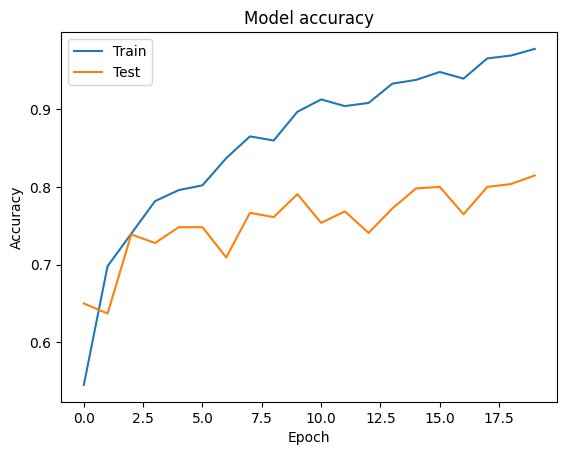

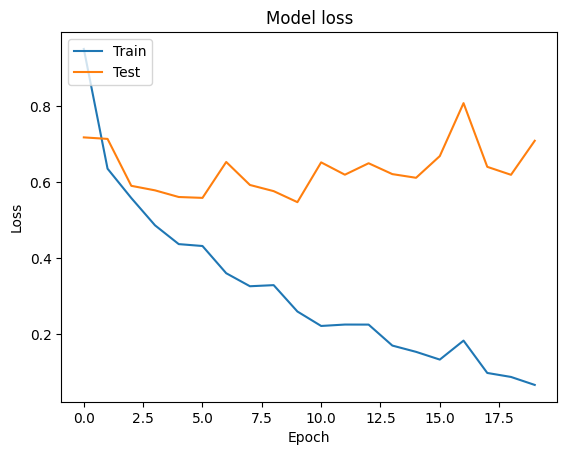

In [2]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       165
           1       0.91      0.97      0.94       202

   micro avg       0.85      0.86      0.86       367
   macro avg       0.84      0.85      0.85       367
weighted avg       0.85      0.86      0.86       367



[[135   7]
 [ 13 165]]


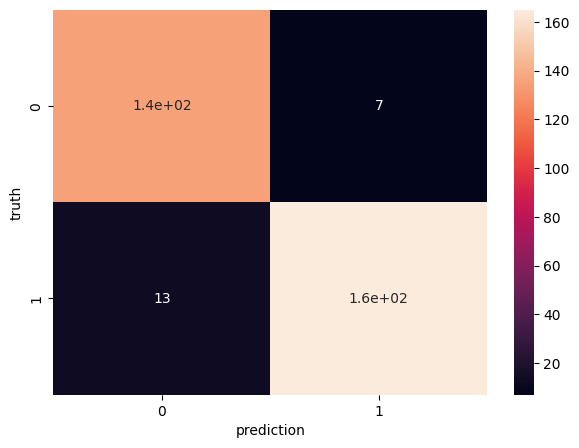

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')
print(conf_matrix)

In [2]:
import keras
import numpy as np
import cv2
import os

# model = ResNet50(weights='imagenet')
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

...

model = ResNet50(weights='imagenet', include_top=False) # set include_top=False to remove the fully connected layer at the end

...

for video_file in os.listdir(f'kaggle/input/vidtimit-audiovideo-dataset/{directory}/{speaker}/video'):
    if video_file == 'sa1' or video_file == 'sa2':
        for i in range(2):
            for j in range(2):
                for k in range(10):
                    image_path = f'kaggle/input/vidtimit-audiovideo-dataset/{directory}/{speaker}/video/{video_file}/{i}{j}{k}.jpg'
                    video = cv2.VideoCapture(image_path)
                    frames = []
                    while True:
                        ret, frame = video.read()
                        if ret:
                            frames.append(frame)
                        else:
                            break
                    video_data.append(np.array(frames))
                    transcriptions.append(video_file.split('.')[0])
                    video.release()
                    
                    # Extract features using ResNet50
                    features = model.predict(preprocess_input(np.array(frames)))
                    # you can use the extracted features for further processing



                        

In [3]:
label1 = []
for transcription in transcriptions:
    if transcription == "sa1":
        label1.append(0)
    elif transcription == "sa2":
        label1.append(1)

In [4]:
video_data = np.array(video_data)
label1 = np.array(label1)


In [5]:
label1.shape

(1081,)

Epoch 1/20
27/27 [==============================] - 18s 546ms/step - loss: 0.6860 - accuracy: 0.5741 - val_loss: 0.6892 - val_accuracy: 0.5530
Epoch 2/20
27/27 [==============================] - 14s 509ms/step - loss: 0.6834 - accuracy: 0.5718 - val_loss: 0.6881 - val_accuracy: 0.5530
Epoch 3/20
27/27 [==============================] - 13s 464ms/step - loss: 0.6830 - accuracy: 0.5718 - val_loss: 0.6882 - val_accuracy: 0.5530
Epoch 4/20
27/27 [==============================] - 13s 469ms/step - loss: 0.6836 - accuracy: 0.5718 - val_loss: 0.6879 - val_accuracy: 0.5530
Epoch 5/20
27/27 [==============================] - 13s 470ms/step - loss: 0.6829 - accuracy: 0.5718 - val_loss: 0.6887 - val_accuracy: 0.5530
Epoch 6/20
27/27 [==============================] - 13s 477ms/step - loss: 0.6831 - accuracy: 0.5718 - val_loss: 0.6882 - val_accuracy: 0.5530
Epoch 7/20
27/27 [==============================] - 12s 451ms/step - loss: 0.6831 - accuracy: 0.5718 - val_loss: 0.6889 - val_accuracy: 0.5530

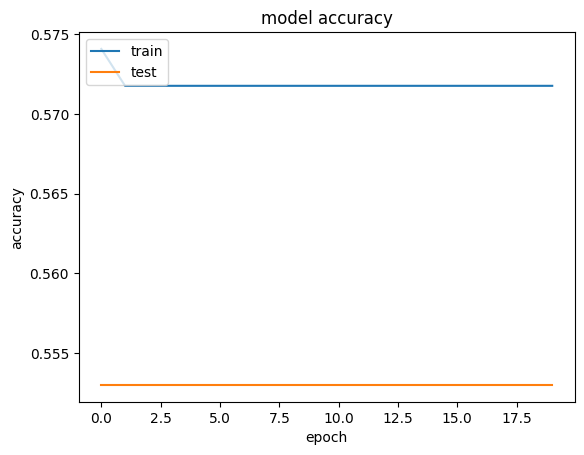

In [6]:
import numpy as np
from keras.layers import LSTM, Dense, TimeDistributed, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load your data here

# reshape the data
video_data = video_data.reshape(1081, 1, 384, 512, 3)

# one-hot encode the labels
label1 = to_categorical(label1)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(video_data, label1, test_size=0.2)

# define the model
model = Sequential()
model.add(TimeDistributed(Flatten(), input_shape=(1, 384, 512, 3)))
model.add(LSTM(32))
model.add(Dense(label1.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# plot the accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert the predictions to the class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute the classification report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)


7/7 [==============================] - 1s 112ms/step
Confusion Matrix: 
 [[120   0]
 [ 97   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       120
           1       0.00      0.00      0.00        97

    accuracy                           0.55       217
   macro avg       0.28      0.50      0.36       217
weighted avg       0.31      0.55      0.39       217



<AxesSubplot: >

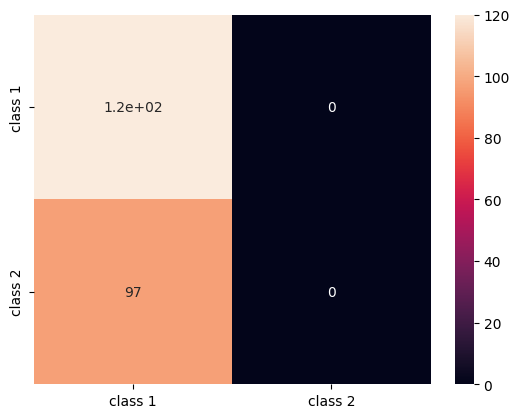

In [12]:
import seaborn as sn

sn.heatmap(conf_matrix, annot = True, xticklabels = ["class 1","class 2"], yticklabels = ["class 1","class 2"])

In [11]:
import numpy as np
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# load your data here

labels = label1

# reshape the data
video_data = video_data.reshape(1081, 384, 512, 3)

# Normalize the data
# video_data = video_data/255

# one-hot encode the labels
labels = to_categorical(labels)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(video_data, labels, test_size=0.2)

# define the model with added dropout layers
model = Sequential()
model.add(LSTM(64, input_shape=(384, 512, 3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50,
                    validation_data=(X_test, y_test))

Found 3000 files belonging to 3 classes.
Epoch 1/20
77/77 [==============================] - 18s 225ms/step - loss: 0.9817 - accuracy: 0.5622 - val_loss: 0.7668 - val_accuracy: 0.5889
Epoch 2/20
77/77 [==============================] - 18s 230ms/step - loss: 0.6836 - accuracy: 0.6728 - val_loss: 0.5909 - val_accuracy: 0.7296
Epoch 3/20
77/77 [==============================] - 18s 239ms/step - loss: 0.5288 - accuracy: 0.7500 - val_loss: 0.5344 - val_accuracy: 0.7741
Epoch 4/20
77/77 [==============================] - 18s 229ms/step - loss: 0.4561 - accuracy: 0.8024 - val_loss: 0.5678 - val_accuracy: 0.7463
Epoch 5/20
77/77 [==============================] - 17s 224ms/step - loss: 0.4485 - accuracy: 0.7959 - val_loss: 0.5075 - val_accuracy: 0.7556
Epoch 6/20
77/77 [==============================] - 17s 225ms/step - loss: 0.4094 - accuracy: 0.8163 - val_loss: 0.5585 - val_accuracy: 0.7519
Epoch 7/20
77/77 [==============================] - 17s 224ms/step - loss: 0.3499 - accuracy: 0.8463 

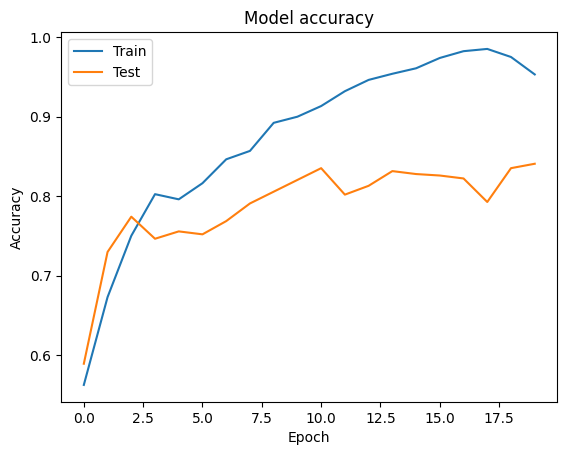

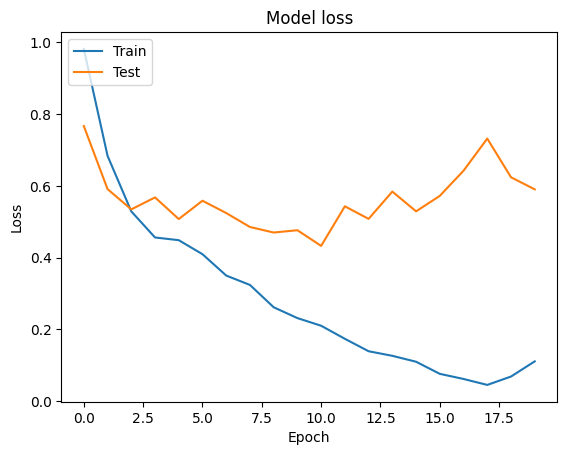

In [12]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[[122  14]
 [  5 195]]


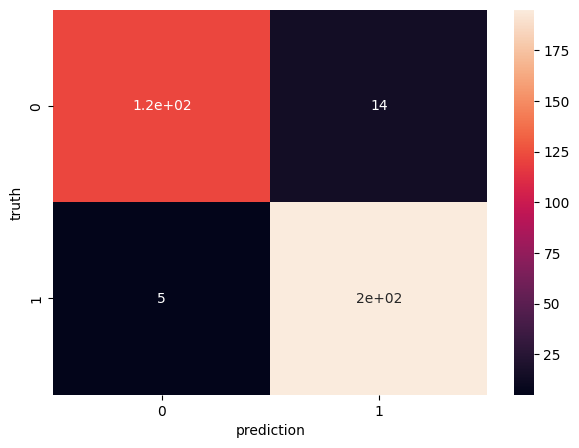

In [18]:
conf_matrix = conf_matrix[:2, :2]
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix,annot=True)
plt.xlabel("prediction")
plt.ylabel('truth')
print(conf_matrix)

In [28]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       165
           1       0.91      0.97      0.94       202

   micro avg       0.85      0.86      0.86       367
   macro avg       0.84      0.85      0.85       367
weighted avg       0.85      0.86      0.86       367

